In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/You tube machine learn/Machine Learning/K-means clustering/customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
89,58,46
92,60,49
80,54,51
63,47,59
72,50,49


In [12]:
data = data.rename(columns ={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

,income,score
0,15,39
12,20,15
85,54,46
91,59,41
55,43,41


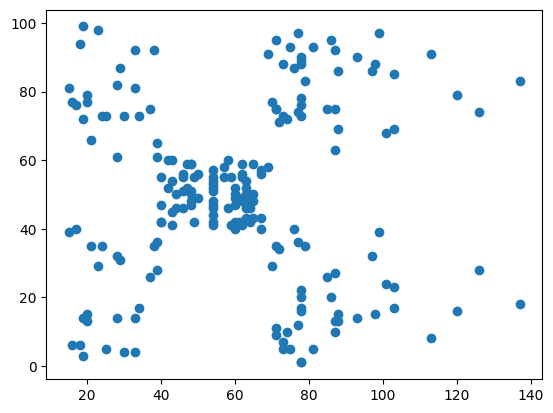

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [20]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_err = []
for i in k_values:
  model = KMeans(n_clusters=i, n_init=10)
  model.fit(data[['income','score']])
  wcss_err.append(model.inertia_)

In [21]:
wcss_err

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 31573.960664122744,
 25011.839349156588,
 21913.92920119442,
 19649.596582866958]

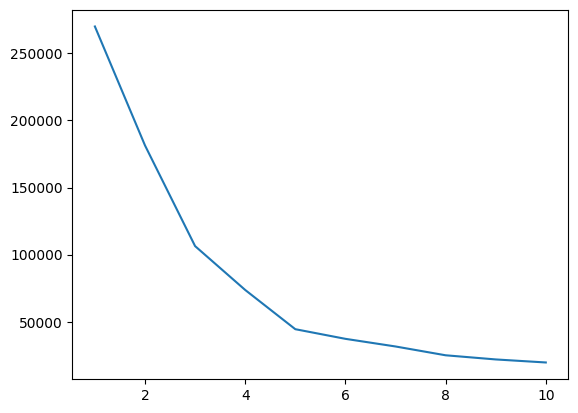

In [22]:
plt.plot(k_values, wcss_err)

In [23]:
#deside K=5 using this plot
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, n_init=10)
pred = model.fit_predict(data)

In [24]:
pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [25]:
data['cluster'] = pred
data.sample(5)

,income,score,cluster
180,97,32,4
193,113,91,2
80,54,51,0
113,64,46,0
177,88,69,2


In [26]:
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]


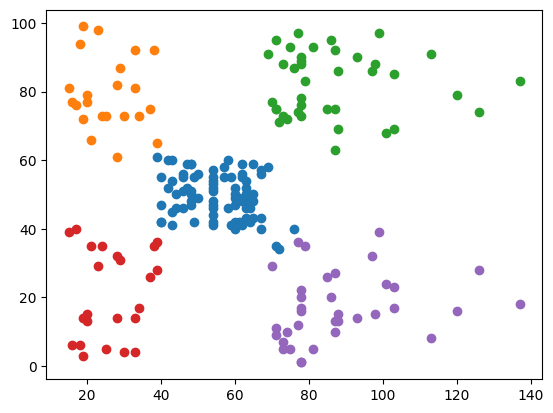

In [28]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])

In [29]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

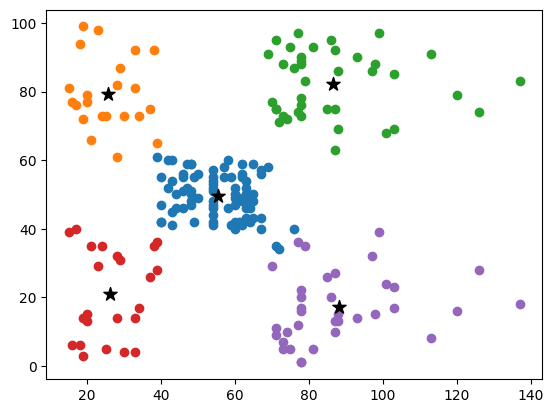

In [34]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black', marker='*',s=100)